# Milestone 1

## Perkenalan

- Nama : Elita Kabayeva
- Batch : 008

### Tujuan
Pada milestones kali ini, didapatkan data penjualan dari 3 cabang supermarket selama 3 bulan. Akan dilakukan:
1. Data Visualisasi
2. Hypothesis Testing

## Importing Library

Pertama akan dilakukan import library yang dibutuhkan terlebih dahulu:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Kemudian, data yang akan diolah di loading dengan menggunakan library pandas.

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

Menampilkan info dari data sebagai gambaran awal:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Data Exploration

Saya menggunakan formula isnull berikut untuk mencari missing values dari data:

In [4]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
Invoice ID,Invoice ID,0.0
Total,Total,0.0
gross income,gross income,0.0
gross margin percentage,gross margin percentage,0.0
cogs,cogs,0.0
Payment,Payment,0.0
Time,Time,0.0
Date,Date,0.0
Tax 5%,Tax 5%,0.0
Branch,Branch,0.0


Karena tidak ada percent values yang terdeteksi, maka akan langsung menampilkan ke 5 data teratas sebagai gambaran awal dari dataset ini:

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Menggunakan formula describe, saya menampilkan gambaran overall dari persebaran statistik data:

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice ID,1000,1000,750-67-8428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,1000,3,A,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1000,3,Yangon,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,1000,2,Member,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,1000,6,Fashion accessories,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,1000.0,NaN,NaN,NaN,55.67213,26.494628,10.08,32.875,55.23,77.935,99.96
Quantity,1000.0,NaN,NaN,NaN,5.51,2.923431,1.0,3.0,5.0,8.0,10.0
Tax 5%,1000.0,NaN,NaN,NaN,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Total,1000.0,NaN,NaN,NaN,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65


## Data Visualization

Karena data sudah terbilang bersih, maka akan langsung dilakukan data visualisasi dari data-data yang ingin diketahui:

## Pendapatan Kotor
Visualisasi yang pertama dilakukan adalah seputar pendapatan kotor.

#### Pendapatan Kotor Masing-Masing Kota

UNtuk mendapatkan data mengenai pendapatan kotor masing-masing kota ini, saya menggunakan formula groupby berikut:

In [7]:
df_kota_penghasilan=df.groupby('City')['gross income'].sum()
df_kota_penghasilan.head()

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

dan kemudian data dari groupby tersebut di visualisasikan dalam bentuk bar chart:

Text(0, 0.5, 'gross income')

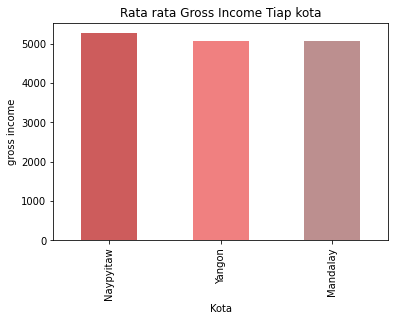

In [8]:
fig1,ax1 = plt.subplots()

palette1 = ['indianred', 'lightcoral', 'rosybrown']

df.groupby('City').sum()['gross income'].sort_values(ascending=False).plot(kind='bar',ax=ax1, color = palette1)

ax1.set_title('Rata rata Gross Income Tiap kota') 
ax1.set_xlabel('Kota') 
ax1.set_ylabel('gross income') 


Terlihat pada grafik, bahwa pendapatran kotor masing-masing kota tidak jauh berbeda.

### Pendapatan Kotor dari Pelanggan

Terdapat dua jenis pelanggan, yaitu :
- Member
- non member

Untuk mendapatkan pendapatan kotor dari masing-masing tipe pelanggan, digunakan formula berikut:

In [9]:
income_split = df.groupby(['Customer type'])['gross income'].mean()
income_split

Customer type
Member    15.609110
Normal    15.148707
Name: gross income, dtype: float64

dan divisualisasikan dengan *bar chart* sebagai berikut:

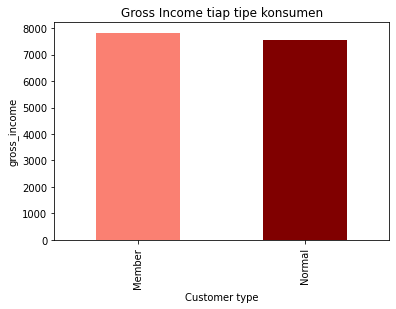

In [10]:
fig2,ax2 = plt.subplots()
palette2 = ['salmon', 'maroon']

df.groupby('Customer type').sum()['gross income'].sort_values(ascending=False).plot(kind='bar',ax=ax2, color=palette2)

ax2.set_title('Gross Income tiap tipe konsumen') 
ax2.set_xlabel('Customer type') 
ax2.set_ylabel('gross_income') 
plt.show()

Terlihat bahwa pendapatan dari member dibanding dengan non-member juga tidak jauh berbeda.

### Pendapatan Kotor Berdasarkan gender

Untuk mendapatkan data pendapatan kotor dari masing-masing gender, digunakan formula berikut:

In [12]:
df.groupby('Gender').sum()['gross income'].sort_values(ascending=False)

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64

dan untuk visualisasinya adalah sebagai berikut:

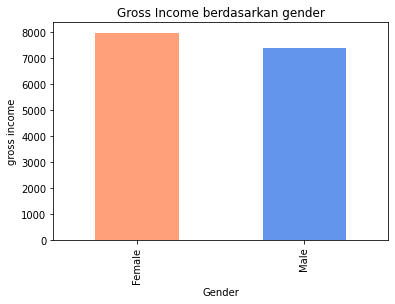

In [13]:
fig3,ax3 = plt.subplots()
palette3 = ['lightsalmon', 'cornflowerblue']
df.groupby('Gender').sum()['gross income'].sort_values(ascending=False).plot(kind='bar',ax=ax3, color = palette3)

ax3.set_title('Gross Income berdasarkan gender') 
ax3.set_xlabel('Gender') 
ax3.set_ylabel('gross income') 
plt.show()

### Pendapatan Kotor per Gender berdasarkan tipe Customer

Untuk mendapatkan visualisasi lebih detail mengenai perbandingan pendapatan kotor per gender antara yang member dengan non-member, digunakan visualisasi sebagai berikut:

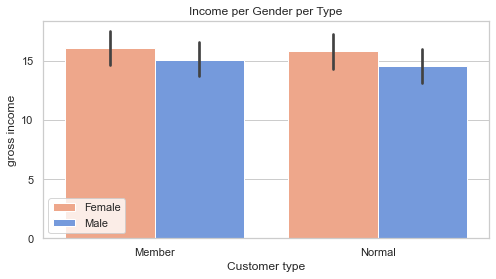

In [14]:
sns.set(rc = {'figure.figsize':(8,4)}, style = "whitegrid")
bar_P = sns.barplot(
data = df,
x = 'Customer type' ,
y =  'gross income' ,
hue = 'Gender',
palette = palette3,
).set(title='Income per Gender per Type')
plt.yticks(list(range(0 , 20 , 5))) # Changing Y axis value for a better reading
plt.legend()

## Sales
Visualisasi yang kedua adalah seputar penjualan

Berikut ini saya menambahkan beberapa kolom pada dataset:
1. Date
2. Time
3. Day
4. Month
5. Year
6. Hour
7. Minute


In [15]:
df['Date'] = pd.to_datetime (df['Date'])
df['Time'] = pd.to_datetime (df['Time'])
df['Day'] = df['Date'].apply(lambda x: x.day)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df ['Minute'] = df['Time'].apply(lambda x: x.minute)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

### Penjualan tiap Cabang per Bulan

Berikut adalah formula untuk mendapatkan total penjualan per bulan dari masing-masing cabang.

In [16]:
sales_by_store_month = df.groupby(['City', 'Month'])['Total'].sum()
sales_by_store_month

City       Month
Mandalay   1        37176.0585
           2        34424.2710
           3        34597.3425
Naypyitaw  1        40434.6810
           2        32934.9825
           3        37199.0430
Yangon     1        38681.1285
           2        29860.1205
           3        37659.1215
Name: Total, dtype: float64

Untuk visualisasinya:

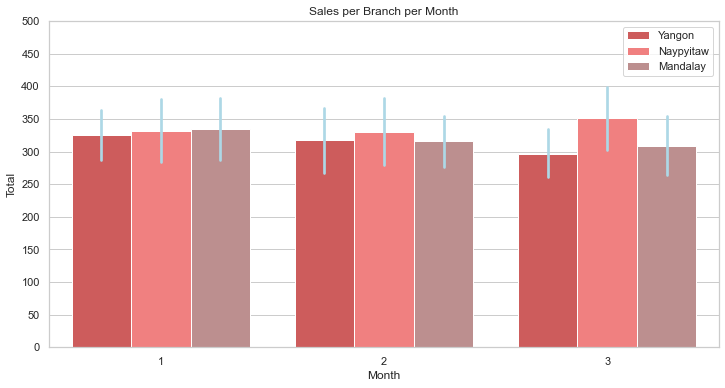

In [17]:
sns.set(rc = {'figure.figsize':(12,6)}, style = "whitegrid")
bar_P = sns.barplot(
data = df,
x = 'Month' ,
y =  'Total' ,
hue = 'City',
palette = palette1,
saturation = 5,
errcolor = 'lightblue'
).set(title='Sales per Branch per Month')
plt.yticks(list(range(0 , 550 , 50))) # Changing Y axis value for a better reading
plt.legend()

Terlihat bahwa per bulan, masing-masing cabang memiliki persebaran penjualan yang tidak terlalu jauh berbeda.

### Penjualan per Hari di tiap Cabang

Berikut adalah penjualan per hari di tiap Cabang (Kota):

In [22]:
city_total = df.groupby('City').agg({'Total':'sum'})

city_total

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


Untuk visualisasinya:

([<matplotlib.patches.Wedge at 0x20d715da650>,
 [Text(0.5634539536285844, 0.9447325770504145, 'Yangon'),
  Text(-1.1999999995846984, 3.1570942481331386e-05, 'Naypyitaw'),
  Text(0.5634290098984011, -0.9447474534524598, 'Mandalay')],
 [Text(0.307338520161046, 0.5153086783911351, '32.9%'),
  Text(-0.6999999997577406, 1.8416383114109977e-05, '34.2%'),
  Text(0.3073249144900369, -0.5153167927922507, '32.9%')])

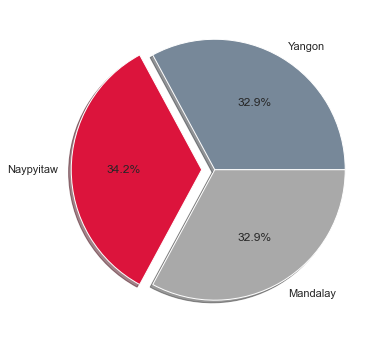

In [23]:
piexplode= [0, 0.1, 0]
piecolors = ["lightslategrey", "crimson", "darkgrey"]
plt.pie(df.groupby('City')['gross income'].sum(), explode= piexplode, labels=df['City'].unique(), autopct= '%1.1f%%', colors= piecolors, shadow= True)

Naypyitaw memiliki penjualan yang sedikit lebih tinggi. Tapi secara umum, ketiga cabang memiliki distribusi yang cukup merata.

### Sales per Day

Untuk mendapatkan penjualan perhari, saya menambahkan satu kolom lagi di dataset. Yaitu kolom week_days:

In [19]:
df["week_days"] = df["Date"].dt.day_name()
df['week_days'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: week_days, dtype: int64

Penjualan per hari di masing-masing cabang:

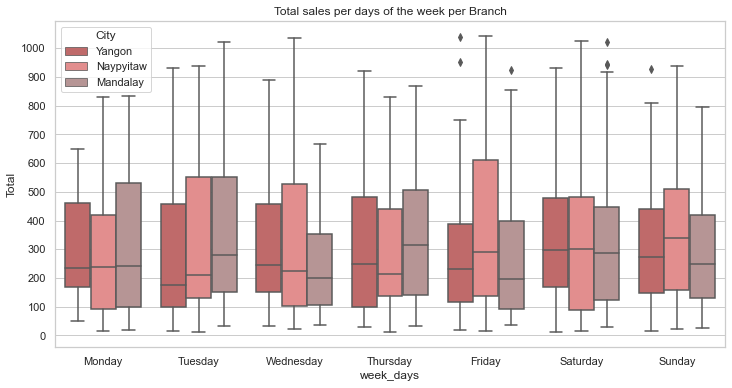

In [20]:
# Creating a list to sort the days of the week on specific order
orderList = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Plotting Total sales per days of the week per branch
box_P = sns.boxplot(
data = df,
    x = 'week_days',
    y = 'Total',
    hue = 'City',
    palette = palette1,
    order= orderList
).set(title='Total sales per days of the week per Branch')

plt.yticks(list(range(0 , 1100 , 100))) # Changing Y axis value for a better reading

# Changing size display
sns.set(rc = {'figure.figsize':(15,10)})

### Daily Branch Sales per gender

Berikutnya saya mencoba memvisualisasikan penjualan di masing-masing cabang per gender:

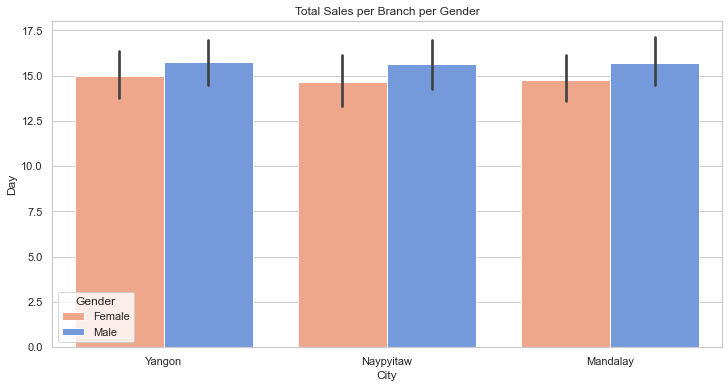

In [22]:
sns.set(rc = {'figure.figsize':(12,6)}, style = "whitegrid")
bar_P = sns.barplot(
data = df,
x = 'City' ,
y =  'Day' ,
hue = 'Gender',
palette = palette3,
).set(title='Total Sales per Branch per Gender')

### Sales per Product Type per Gender

Terakhir, untuk visualisasi penjualan masing-masing produk per gender:

([<matplotlib.axis.YTick at 0x2845af41690>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

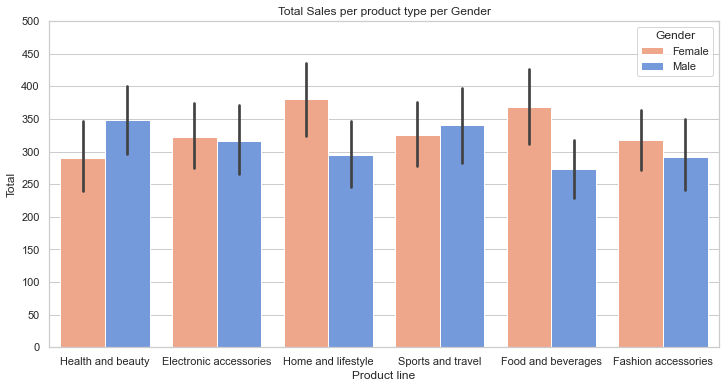

In [23]:
sns.set(rc = {'figure.figsize':(12,6)}, style = "whitegrid")
bar_P = sns.barplot(
data = df,
x = 'Product line' ,
y =  'Total' ,
hue = 'Gender',
palette = palette3,
).set(title='Total Sales per product type per Gender')

plt.yticks(list(range(0 , 550 , 50))) # Changing Y axis value for a better reading

### Rata-Rata Rating Kepuasan Pelanggan

Berikut ini adalah data rata-rata rating pelanggan dalam skala 1-10:

In [25]:
avg_ratings_store = df.groupby('Branch')['Rating'].mean()
avg_ratings_store

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

## Payment

Visualisasi yang ketiga adalah mengenai metode pembayaran yang digunakan:

C:\Users\yevaw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yevaw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='Total'>

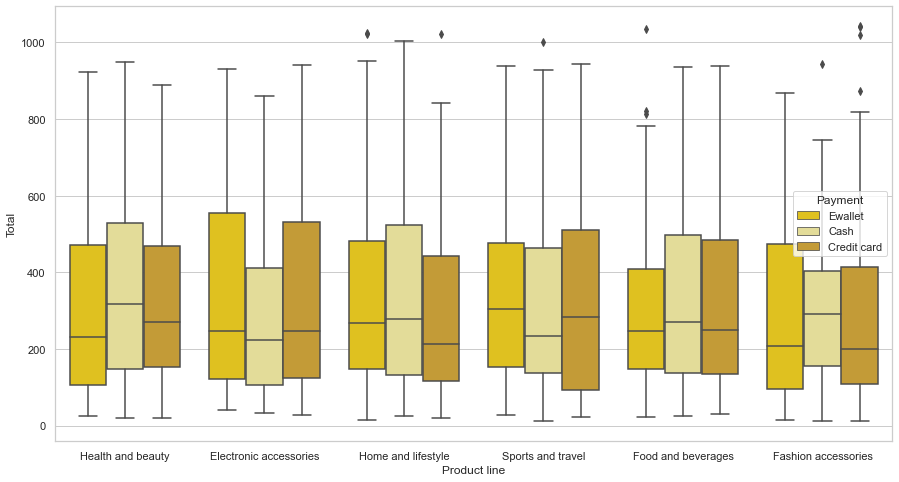

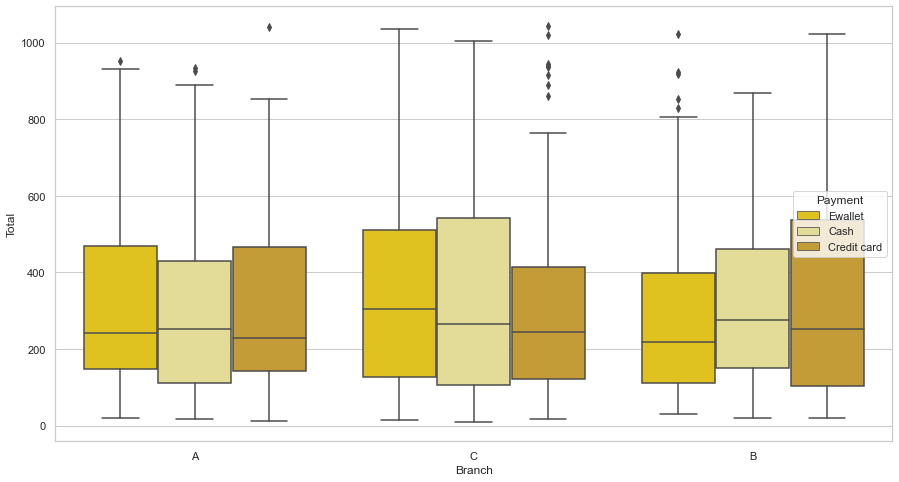

In [24]:
palette4 = ['gold', 'khaki', 'goldenrod']

plt.figure(figsize = (15,8))
sns.boxplot('Product line','Total','Payment',data = df, palette = palette4)

plt.figure(figsize = (15,8))
sns.boxplot('Branch','Total','Payment',data = df, palette = palette4)

Dari data diatas, baik di masing-masing cabang maupun pada jenis produk apapun, terlihat bahwa ketiga metode pembayaran digunakan secara cukup merata.

## Overall

Pada bagian ini, akan ditampilkan mengenai grafik overall dari data supermarket:

### Distribusi Penjualan Produk

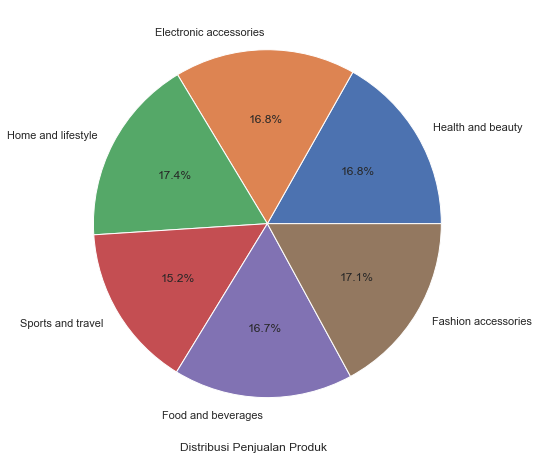

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64


In [27]:
# Product wise income
plt.figure(figsize = (10,8))
plt.pie(df.groupby('Product line')['gross income'].sum(),explode= None, labels=df['Product line'].unique(), autopct='%1.1f%%')
plt.show(plt.text(x = -0.5,y = -1.3, s = 'Distribusi Penjualan Produk'))
print(df.groupby('Product line')['gross income'].sum())

### Distribusi Metode Pembayaran yang Digunakan

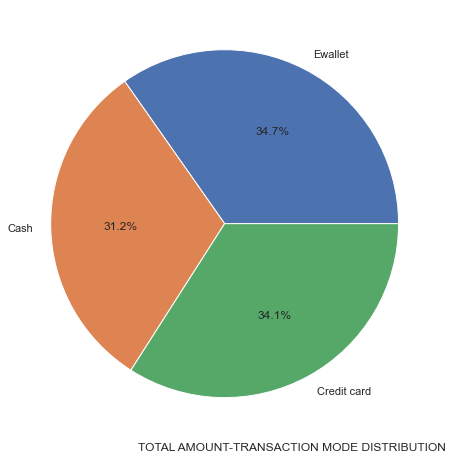

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64


In [29]:
# Payment mode wise income
plt.figure(figsize = (10,8))
plt.pie(df.groupby('Payment')['gross income'].sum(),explode= None, labels=df['Payment'].unique(), autopct='%1.1f%%')
plt.show(plt.text(x = -0.5,y = -1.3, s = 'TOTAL AMOUNT-TRANSACTION MODE DISTRIBUTION'))
print(df.groupby('Payment')['gross income'].sum())


### Distribusi Penjualan masing-masing Kota

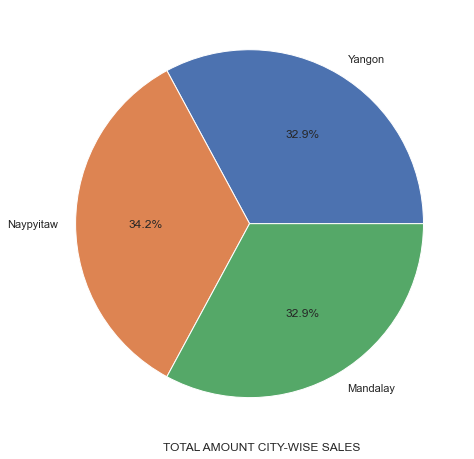

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64


In [28]:
# City-wise Income
plt.figure(figsize = (10,8))
plt.pie(df.groupby('City')['Total'].sum(),explode= None, labels=df['City'].unique(), autopct='%1.1f%%')
plt.show(plt.text(x = -0.5,y = -1.3, s = 'TOTAL AMOUNT CITY-WISE SALES'))
print(df.groupby('Payment')['gross income'].sum())

# Hypotest

Pada hypothesis testing, saya akan melakukan uji apakah rata-rata pendapatan kotor dari pelanggan member sama dengan rata-rata pendapatan kotor dari pelanggan non-member.

Hipotesis :

- H0 : mean_grossincome_member = mean_grossincome_nonmember
- H1 : mean_grossincome_member != mean_grossincome_nonmember

Berikut adalah query data untuk gross income dari member dan non-member yang akan digunakan:

In [33]:
Member = df[df['Customer type']=='Member'][['Invoice ID','gross income']].groupby('Invoice ID').sum()
non = df[df['Customer type']=='Normal'][['Invoice ID','gross income']].groupby('Invoice ID').sum()
print('Rata-rata penghasilan kotor dari Konsumen dengan status member: {}'.format(np.round(Member['gross income'].mean())))
print('Rata-rata penghasilan kotor dari Konsumen dengan status non-member: {}'.format(np.round(non['gross income'].mean())))

Rata-rata penghasilan kotor dari Konsumen dengan status member: 16.0
Rata-rata penghasilan kotor dari Konsumen dengan status non-member: 15.0


Dilakukan testing p value sebagai berikut untuk kedua data penghasilan kotor member dan non-member:

In [34]:
t_stat, p_val = stats.ttest_ind(Member,non)
print('P-value:',p_val)#the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: [0.53439496]
t-statistics: [0.62152687]


Karena nilai p-value yang didapatkan lebih dari 0.05, maka Hipotesis Null diterima. Yang mana berarti **Rata-Rata Pendapatan Kotor dari Pelanggan Member sama dengan Rata-Rata Pendapatan Kotor dari Pelanggan Non-Member**

### Visualisasi

C:\Users\yevaw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yevaw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


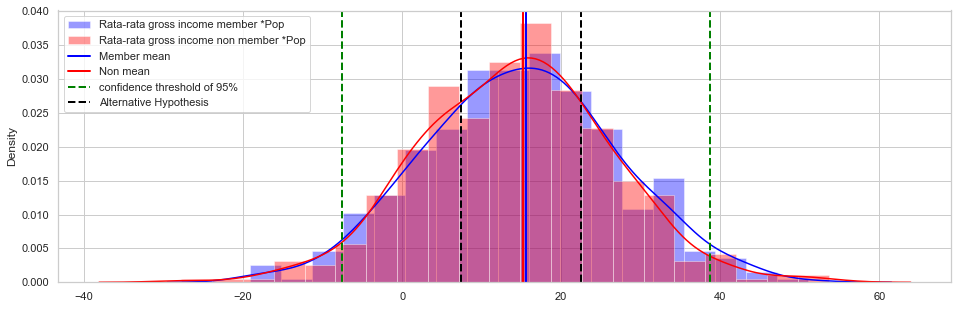

In [35]:
Memb_pop = np.random.normal(Member['gross income'].mean(), Member['gross income'].std(),500)
biasa_pop = np.random.normal(non['gross income'].mean(), non['gross income'].std(),500)

ci = stats.norm.interval(0.95,Member['gross income'].mean(), Member['gross income'].std())
plt.figure(figsize=(16,5))
sns.distplot(Memb_pop, label='Rata-rata gross income member *Pop',color='blue')
sns.distplot(biasa_pop, label='Rata-rata gross income non member *Pop',color='red')


plt.axvline(Member['gross income'].mean(), color='blue', linewidth=2, label='Member mean')
plt.axvline(non['gross income'].mean(), color='red',  linewidth=2, label='Non mean')


plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Memb_pop.mean()+t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Memb_pop.mean()-t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()
